In [1]:
cd(@__DIR__)
using Pkg
Pkg.activate("./")

  Activating environment at `~/ManningLiveProjects/julia/kmeans-dbscan-clustering/dbscan-clustering/Project.toml`


In [2]:
import Downloads
import SHA
using Arrow
using Chain
using DataFrames, Random, DelimitedFiles, CSV
using Plots
using FreqTables
using Statistics
using StatsBase
using SHA
using Clustering
using Distances

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1342


In [3]:
df = DataFrame(Arrow.Table("./../data-prep/sales_norm.arrow"))

,P1,P2,P3,P4,P5,P6,P7
,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.369588,1.27724,-0.579404,1.04645,-0.142511,-0.498219,-0.0405672
2,0.640272,0.854207,0.790096,-0.075517,-1.06883,-0.498219,1.64703
3,0.0989037,-0.414901,-0.237029,1.32694,1.40135,-0.903022,-0.462466
4,-0.442464,-0.837937,0.105346,-0.916993,0.783809,1.12099,1.22513
5,0.910956,1.27724,0.447721,0.204975,-0.760057,0.71619,1.64703
6,0.640272,-1.26097,-0.237029,-0.636501,-0.451284,-0.498219,1.22513
7,1.18164,0.854207,-0.579404,0.204975,0.166262,1.5258,-0.884365
8,3.07643,-0.414901,1.47485,1.32694,1.71013,0.71619,-0.462466
9,-0.983832,-0.414901,1.13247,1.32694,0.166262,0.71619,2.49083


In [4]:
dataMat = Matrix(df)

52×811 Matrix{Float64}:
  0.369588    1.27724     -0.579404  …   0.571772  -0.594121  -0.438798
  0.640272    0.854207     0.790096     -0.571772  -0.594121   0.987295
  0.0989037  -0.414901    -0.237029     -0.571772  -0.594121  -0.438798
 -0.442464   -0.837937     0.105346     -0.571772   1.22319   -0.438798
  0.910956    1.27724      0.447721      0.571772  -0.594121  -0.438798
  0.640272   -1.26097     -0.237029  …   0.571772  -0.594121  -0.438798
  1.18164     0.854207    -0.579404      1.71532   -0.594121  -0.438798
  3.07643    -0.414901     1.47485       0.571772  -0.594121  -0.438798
 -0.983832   -0.414901     1.13247       0.571772   1.22319   -0.438798
  1.18164    -0.414901    -0.921779     -0.571772  -0.594121  -0.438798
  0.369588   -0.837937     1.81722   …  -0.571772  -0.594121  -0.438798
  1.18164    -0.837937     0.105346      0.571772  -0.594121  -0.438798
  1.72301     0.854207    -1.60653      -0.571772  -0.594121  -0.438798
  ⋮                                  ⋱  

In [5]:
# compute distances between each of the products -> 811x811 result
prodDiffs = pairwise(SqEuclidean(), dataMat)# pairwise(Euclidean(), dataMat, dims=2)

811×811 Matrix{Float64}:
   0.0      92.4649   99.5619  100.616   …  106.024   130.323   109.839
  92.4649    0.0      98.3234   83.6628     114.094   107.648    76.2906
  99.5619   98.3234    0.0      68.1371     124.708   100.468    90.3569
 100.616    83.6628   68.1371    0.0        106.491   125.017    56.6453
  90.1702  110.762   100.439   102.426       94.9381  104.072   123.475
 116.16     85.1388  106.798    92.9689  …   64.0414   75.4033   93.5627
 101.583    96.2544  101.267    94.2715     109.237   107.573   123.105
 107.022    81.8551  122.745   115.459      102.0      95.5615  107.649
  82.2256   90.6944  106.477   117.051      106.643   117.949   115.006
  85.2477  108.437    94.3263  127.657      106.288    81.005   118.455
  91.4367  106.137    93.5677   93.1621  …   86.9315  117.775   100.339
  94.9118   91.0407   95.4248   99.273       93.0782   80.0053   80.4323
 109.203   101.32     89.2011   73.4217     104.422   118.022   105.484
   ⋮                              

DBSCAN tuning parameters eps and min_points

In [6]:
#eps::Real: the radius of a point neighborhood
#minpts::Int: the minimum number of neighboring points (including itself) to qualify a point as a density point.
eps = range(20, 70; step=0.5)
min_points = range(1,6;step=1)

1:1:6

In [7]:
avg_shts_m = Vector{Float64}[]
no_clust_m = Vector{Int64}[]
avg_clust_size_m = Array{Float64}[]
for mp in min_points
    avg_shts = Float64[]
    no_clust = Int64[]
    avg_clust_size = Float64[]
    for e in eps
       clustering = dbscan(prodDiffs, e, mp)
       cAssignments = clustering.assignments
       if maximum(cAssignments) <= 1
           silh = NaN
       else
           idx = cAssignments .!=0
           silh = mean(silhouettes(cAssignments[idx], prodDiffs[idx, idx]))
       end
        push!(avg_shts, silh)
        push!(no_clust, maximum(cAssignments))
        push!(avg_clust_size, mean(clustering.counts))
    end
    push!(avg_shts_m, avg_shts)
    push!(no_clust_m, no_clust)
    push!(avg_clust_size_m, avg_clust_size)
end
       
#dbscan(prodDiffs, 50, 5)

Plot the average silhouettes values.

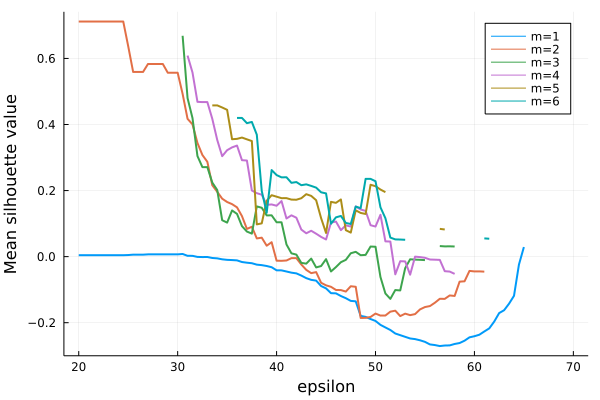

In [8]:
plot(eps, avg_shts_m, xlab = "epsilon", ylab = "Mean silhouette value", 
    labels = permutedims(["m="*string(m) for m in 1:6]), linewidth = 2)

Plot number of custers for minpoints > 1

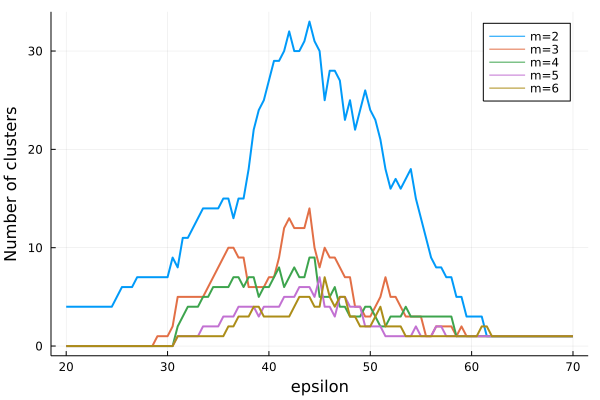

In [9]:
plot(eps, no_clust_m[2:end], xlab = "epsilon", ylab = "Number of clusters", 
    labels = permutedims(["m="*string(m) for m in 2:6]), linewidth = 2)

Average cluster size for minpts > 1

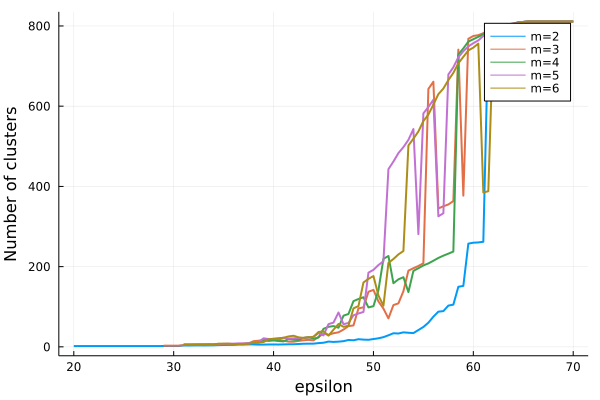

In [10]:
plot(eps, avg_clust_size_m[2:end], xlab = "epsilon", ylab = "Number of clusters", 
    labels = permutedims(["m="*string(m) for m in 2:6]), linewidth = 2)

Based on silhoutte first peak with min epsilon, pick eps = 50 and min pts 6

In [11]:
opt_clustering = dbscan(prodDiffs, 50.0, 6)

DbscanResult([14, 17], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0  …  0, 0, 0, 1, 1, 0, 1, 1, 0, 0], [260, 93])

In [12]:
freqtable(opt_clustering.assignments)

3-element Named Vector{Int64}
Dim1  │ 
──────┼────
0     │ 458
1     │ 260
2     │  93

Outliers are in cluster 0

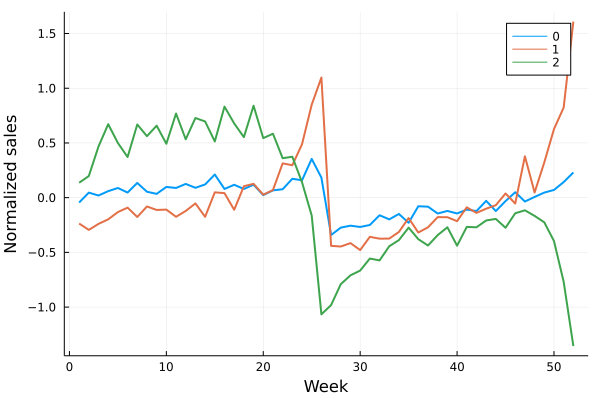

In [13]:
# Plot of average sales based on assignments above
plot(hcat([mean(dataMat[:, opt_clustering.assignments .== i], dims=2) for i in 0:2]...), 
    xlab="Week", ylab="Normalized sales", labels=[0 1 2], linewidth=2)

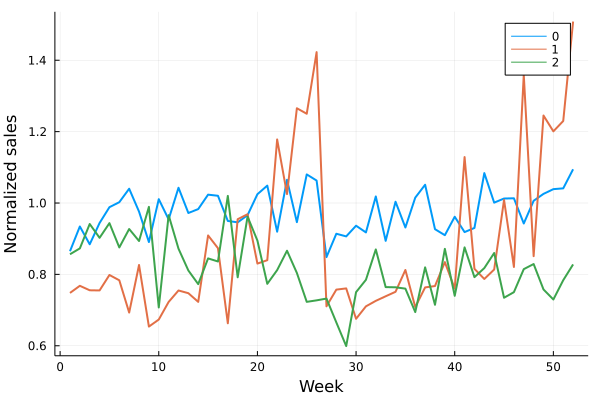

In [14]:
# Plot cluster std sales based on assignments above
plot(hcat([std(dataMat[:, opt_clustering.assignments .== i], dims=2) for i in 0:2]...), 
    xlab="Week", ylab="Normalized sales", labels=[0 1 2], linewidth=2)

In [19]:
#Load kmeans assignements from text file
kmeans_assignments = parse.(Int64, readlines("../k-means-clustering/kmeans_assignments.txt"));

In [20]:
freqtable(opt_clustering.assignments, kmeans_assignments)

3×4 Named Matrix{Int64}
Dim1 ╲ Dim2 │   1    2    3    4
────────────┼───────────────────
0           │  68  132  169   89
1           │  99    3   44  114
2           │   0   92    0    1

In [21]:
# Save DBSCAN assignments to the text file
open("dbscan_assignments.txt", "w") do io
    foreach(e -> println(io, e), opt_clustering.assignments)
  end